In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dmepos = pd.read_csv("provider_data/dmepos/DMEPOS.csv",encoding='ISO-8859-1',low_memory=False)
leie_ex = pd.read_csv("provider_data/LEIE_Exclusion.csv",encoding='ISO-8859-1',low_memory=False)

In [3]:
dmepos

,Rfrg_NPI,Rfrg_Prvdr_Last_Name_Org,Rfrg_Prvdr_First_Name,Rfrg_Prvdr_MI,Rfrg_Prvdr_Crdntls,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Ent_Cd,Rfrg_Prvdr_St1,Rfrg_Prvdr_St2,Rfrg_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.729650
1,1003000522,Weigand,Frederick,J,MD,M,I,1565 Saxon Blvd,Suite 102,Deltona,...,NaN,0.75,0.73,0.75,0.39,NaN,0.58,0.0,NaN,1.654308
2,1003000530,Semonche,Amanda,M,DO,F,I,1021 Park Ave,Suite 203,Quakertown,...,NaN,0.68,0.74,0.75,NaN,NaN,NaN,NaN,NaN,1.894526
3,1003000597,Kim,Dae,Y,"M.D., PH.D",M,I,1145 S Utica Ave,Suite 202,Tulsa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173167
4,1003000738,Zumwalt,Juliette,A,P.A.,F,I,7401 S. Main,NaN,Houston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.819692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383483,1992998645,Marupudi,Seshasree,NaN,MD,F,I,129 Vision Park Blvd,Ste 300,Shenandoah,...,0.48,0.65,0.75,0.75,0.50,NaN,0.57,NaN,NaN,2.350335
383484,1992998736,Langley,Adam,W,M.D.,M,I,2940 Maguire Rd,NaN,Ocoee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.382273
383485,1992999122,Johnson,Charles,R,D.O.,M,I,1601 Clint Moore Rd,155,Boca Raton,...,0.26,0.60,0.60,0.73,0.66,NaN,0.47,NaN,NaN,2.096019
383486,1992999551,Molai,Indira,NaN,M.D.,F,I,625 E Grand Ave,NaN,Escondido,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.451024


In [4]:
dmepos.columns

Index(['Rfrg_NPI', 'Rfrg_Prvdr_Last_Name_Org', 'Rfrg_Prvdr_First_Name',
       'Rfrg_Prvdr_MI', 'Rfrg_Prvdr_Crdntls', 'Rfrg_Prvdr_Gndr',
       'Rfrg_Prvdr_Ent_Cd', 'Rfrg_Prvdr_St1', 'Rfrg_Prvdr_St2',
       'Rfrg_Prvdr_City', 'Rfrg_Prvdr_State_Abrvtn', 'Rfrg_Prvdr_State_FIPS',
       'Rfrg_Prvdr_Zip5', 'Rfrg_Prvdr_RUCA', 'Rfrg_Prvdr_RUCA_Desc',
       'Rfrg_Prvdr_Cntry', 'Rfrg_Prvdr_Type', 'Rfrg_Prvdr_Type_Flag',
       'Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds', 'Tot_Suplr_Benes',
       'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs',
       'Suplr_Mdcr_Alowd_Amt', 'Suplr_Mdcr_Pymt_Amt',
       'Suplr_Mdcr_Stdzd_Pymt_Amt', 'DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes', 'DME_Tot_Suplr_Clms',
       'DME_Tot_Suplr_Srvcs', 'DME_Suplr_Sbmtd_Chrgs',
       'DME_Suplr_Mdcr_Alowd_Amt', 'DME_Suplr_Mdcr_Pymt_Amt',
       'DME_Suplr_Mdcr_Stdzd_Pymt_Amt', 'POS_Sprsn_Ind', 'POS_Tot_Suplrs',
       'POS_Tot_Suplr_HCPCS_Cds', 'POS_Tot_Suplr_Benes', '

In [5]:
dmepos = dmepos.dropna(subset=["Rfrg_NPI"],axis=0)
dmepos = dmepos.dropna(subset=["Rfrg_Prvdr_Last_Name_Org"],axis=0)
dmepos = dmepos.dropna(subset=["Rfrg_Prvdr_First_Name"],axis=0)

In [6]:
leie_ex = leie_ex.dropna(subset=["NPI"],axis=0)
ex_npi = leie_ex[leie_ex["NPI"]!=0]["NPI"]
ex_lnames = leie_ex.dropna(subset=["LASTNAME"],axis=0)["LASTNAME"]
ex_fnames = leie_ex.dropna(subset=["FIRSTNAME"],axis=0)["FIRSTNAME"]
leie_ex["MIDNAME"] = leie_ex["MIDNAME"].apply(lambda row : row if row!= " " else 0)
ex_mi = leie_ex[leie_ex["MIDNAME"]!=0]["MIDNAME"]

In [7]:
print(leie_ex.shape)
print(dmepos.shape)

(76546, 18)
(383477, 89)


In [8]:
ex_npi_unique = leie_ex.drop_duplicates("NPI")  # Remove duplicate NPI values
ex_npi_dict = dict(zip(ex_npi_unique['NPI'], ex_npi_unique['EXCLTYPE']))

dmepos['Fraud'] = np.where(dmepos['Rfrg_NPI'].isin(ex_npi_dict), 1, 0)
dmepos['FraudType'] = np.where(dmepos['Fraud'] == 1,dmepos['Rfrg_NPI'].map(ex_npi_dict),0)

In [9]:
dmepos["Fraud"].value_counts()

0    383375
1       102
Name: Fraud, dtype: int64

In [11]:
dmepos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383477 entries, 0 to 383487
Data columns (total 91 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Rfrg_NPI                        383477 non-null  int64  
 1   Rfrg_Prvdr_Last_Name_Org        383477 non-null  object 
 2   Rfrg_Prvdr_First_Name           383477 non-null  object 
 3   Rfrg_Prvdr_MI                   269163 non-null  object 
 4   Rfrg_Prvdr_Crdntls              365244 non-null  object 
 5   Rfrg_Prvdr_Gndr                 383477 non-null  object 
 6   Rfrg_Prvdr_Ent_Cd               383477 non-null  object 
 7   Rfrg_Prvdr_St1                  383477 non-null  object 
 8   Rfrg_Prvdr_St2                  114735 non-null  object 
 9   Rfrg_Prvdr_City                 383477 non-null  object 
 10  Rfrg_Prvdr_State_Abrvtn         383477 non-null  object 
 11  Rfrg_Prvdr_State_FIPS           383475 non-null  object 
 12  Rfrg_Prvdr_Zip5 

In [12]:
dmepos.columns

Index(['Rfrg_NPI', 'Rfrg_Prvdr_Last_Name_Org', 'Rfrg_Prvdr_First_Name',
       'Rfrg_Prvdr_MI', 'Rfrg_Prvdr_Crdntls', 'Rfrg_Prvdr_Gndr',
       'Rfrg_Prvdr_Ent_Cd', 'Rfrg_Prvdr_St1', 'Rfrg_Prvdr_St2',
       'Rfrg_Prvdr_City', 'Rfrg_Prvdr_State_Abrvtn', 'Rfrg_Prvdr_State_FIPS',
       'Rfrg_Prvdr_Zip5', 'Rfrg_Prvdr_RUCA', 'Rfrg_Prvdr_RUCA_Desc',
       'Rfrg_Prvdr_Cntry', 'Rfrg_Prvdr_Type', 'Rfrg_Prvdr_Type_Flag',
       'Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds', 'Tot_Suplr_Benes',
       'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs',
       'Suplr_Mdcr_Alowd_Amt', 'Suplr_Mdcr_Pymt_Amt',
       'Suplr_Mdcr_Stdzd_Pymt_Amt', 'DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes', 'DME_Tot_Suplr_Clms',
       'DME_Tot_Suplr_Srvcs', 'DME_Suplr_Sbmtd_Chrgs',
       'DME_Suplr_Mdcr_Alowd_Amt', 'DME_Suplr_Mdcr_Pymt_Amt',
       'DME_Suplr_Mdcr_Stdzd_Pymt_Amt', 'POS_Sprsn_Ind', 'POS_Tot_Suplrs',
       'POS_Tot_Suplr_HCPCS_Cds', 'POS_Tot_Suplr_Benes', '

In [13]:
dmepos["Fraud"].value_counts()

0    383375
1       102
Name: Fraud, dtype: int64

In [14]:
dmepos['Rfrg_Prvdr_Ent_Cd'].value_counts()

I    383477
Name: Rfrg_Prvdr_Ent_Cd, dtype: int64

In [15]:
dmepos[dmepos['FraudType'].isnull()]["Fraud"].value_counts()

Series([], Name: Fraud, dtype: int64)

In [20]:
# Only US Frauds
dmepos = dmepos[dmepos["Rfrg_Prvdr_Cntry"] == 'US']

### Rfrg_Prvdr_Crdntls

In [17]:
dmepos["Rfrg_Prvdr_Crdntls"].value_counts()

MD                    114066
M.D.                  108552
D.O.                   17575
PA-C                   15426
DO                     13217
                       ...  
AGACNP, RN, APRN           1
MSN ARNP FNP               1
DNP,  APRN, FNP-BC         1
CR-NP                      1
M.D., M.S., FAAFP          1
Name: Rfrg_Prvdr_Crdntls, Length: 5465, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dmepos['Rfrg_Prvdr_Crdntls'] = label_encoder.fit_transform(dmepos['Rfrg_Prvdr_Crdntls'])

In [19]:
dmepos["Rfrg_Prvdr_Crdntls"].value_counts()

3017    114066
2362    108552
5465     18233
1186     17575
4587     15426
         ...  
156          1
3793         1
1394         1
1040         1
2620         1
Name: Rfrg_Prvdr_Crdntls, Length: 5466, dtype: int64

### Rfrg_Prvdr_Gndr

In [21]:
dmepos["Rfrg_Prvdr_Gndr"].value_counts()

M    214431
F    169026
Name: Rfrg_Prvdr_Gndr, dtype: int64

In [23]:
# Binary Encoding
dmepos["Rfrg_Prvdr_Gndr"] = dmepos["Rfrg_Prvdr_Gndr"].apply(lambda row : 1 if row == "F" else 0).astype(float)

In [24]:
dmepos["Rfrg_Prvdr_Gndr"].value_counts()

0.0    214431
1.0    169026
Name: Rfrg_Prvdr_Gndr, dtype: int64

### Rfrg_Prvdr_Type

In [26]:
dmepos["Rfrg_Prvdr_Type"].value_counts()

Family Practice                            75080
Internal Medicine                          75012
Nurse Practitioner                         64663
Physician Assistant                        29538
Orthopedic Surgery                         15949
                                           ...  
Religious Nonmedical Nursing Personnel         1
Licensed Vocational Nurse                      1
Skilled Nursing Facility                       1
Counselor                                      1
Emergency Medical Technician, Paramedic        1
Name: Rfrg_Prvdr_Type, Length: 119, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dmepos['Rfrg_Prvdr_Type'] = label_encoder.fit_transform(dmepos['Rfrg_Prvdr_Type'])

In [28]:
dmepos["Rfrg_Prvdr_Type"].value_counts()

26     75080
44     75012
65     64663
87     29538
72     15949
       ...  
102        1
51         1
105        1
17         1
22         1
Name: Rfrg_Prvdr_Type, Length: 119, dtype: int64

### Rfrg_Prvdr_Type_Flag

In [29]:
dmepos["Rfrg_Prvdr_Type_Flag"].value_counts()

S    378254
T      5203
Name: Rfrg_Prvdr_Type_Flag, dtype: int64

In [30]:
# Binary Encoding
dmepos["Rfrg_Prvdr_Type_Flag"] = dmepos["Rfrg_Prvdr_Type_Flag"].apply(lambda row : 1 if row == "S" else 0).astype(float)

In [31]:
dmepos["Rfrg_Prvdr_Type_Flag"].value_counts()

1.0    378254
0.0      5203
Name: Rfrg_Prvdr_Type_Flag, dtype: int64

### DME_Sprsn_Ind

In [32]:
dmepos["DME_Sprsn_Ind"].value_counts()

*    41627
#     3950
Name: DME_Sprsn_Ind, dtype: int64

In [33]:
# Binary Encoding
dmepos["DME_Sprsn_Ind"] = dmepos["DME_Sprsn_Ind"].apply(lambda row : 1 if row == "#" else 0).astype(float)

In [34]:
dmepos["DME_Sprsn_Ind"].value_counts()

0.0    379507
1.0      3950
Name: DME_Sprsn_Ind, dtype: int64

### POS_Sprsn_Ind

In [35]:
dmepos["POS_Sprsn_Ind"].value_counts()

*    134920
#     55230
Name: POS_Sprsn_Ind, dtype: int64

In [36]:
# Binary Encoding
dmepos["POS_Sprsn_Ind"] = dmepos["POS_Sprsn_Ind"].apply(lambda row : 1 if row == "#" else 0).astype(float)

In [37]:
dmepos["POS_Sprsn_Ind"].value_counts()

0.0    328227
1.0     55230
Name: POS_Sprsn_Ind, dtype: int64

### Drug_Sprsn_Ind

In [38]:
dmepos["Drug_Sprsn_Ind"].value_counts()

*    100434
#     95125
Name: Drug_Sprsn_Ind, dtype: int64

In [39]:
# Binary Encoding
dmepos["Drug_Sprsn_Ind"] = dmepos["Drug_Sprsn_Ind"].apply(lambda row : 1 if row == "#" else 0).astype(float)

In [40]:
dmepos["Drug_Sprsn_Ind"].value_counts()

0.0    288332
1.0     95125
Name: Drug_Sprsn_Ind, dtype: int64

### FraudType

In [41]:
dmepos["FraudType"].value_counts()

0            383355
1128a1           32
1128b4           23
1128a4           20
1128a1            9
1128a3            6
1128b7            5
1128a2            4
1128a2            1
1128a3            1
1128b2            1
Name: FraudType, dtype: int64

In [45]:
dmepos["FraudType"] = dmepos["FraudType"].astype('str')

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dmepos['FraudType'] = label_encoder.fit_transform(dmepos['FraudType'])

In [47]:
dmepos["FraudType"].value_counts()

0     383355
1         32
9         23
7         20
2          9
5          6
10         5
3          4
4          1
6          1
8          1
Name: FraudType, dtype: int64

In [52]:
dmepos["Rfrg_Prvdr_Cntry"].value_counts()

US    383457
Name: Rfrg_Prvdr_Cntry, dtype: int64

In [49]:
dmepos.columns

Index(['Rfrg_NPI', 'Rfrg_Prvdr_Last_Name_Org', 'Rfrg_Prvdr_First_Name',
       'Rfrg_Prvdr_MI', 'Rfrg_Prvdr_Crdntls', 'Rfrg_Prvdr_Gndr',
       'Rfrg_Prvdr_Ent_Cd', 'Rfrg_Prvdr_St1', 'Rfrg_Prvdr_St2',
       'Rfrg_Prvdr_City', 'Rfrg_Prvdr_State_Abrvtn', 'Rfrg_Prvdr_State_FIPS',
       'Rfrg_Prvdr_Zip5', 'Rfrg_Prvdr_RUCA', 'Rfrg_Prvdr_RUCA_Desc',
       'Rfrg_Prvdr_Cntry', 'Rfrg_Prvdr_Type', 'Rfrg_Prvdr_Type_Flag',
       'Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds', 'Tot_Suplr_Benes',
       'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs',
       'Suplr_Mdcr_Alowd_Amt', 'Suplr_Mdcr_Pymt_Amt',
       'Suplr_Mdcr_Stdzd_Pymt_Amt', 'DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes', 'DME_Tot_Suplr_Clms',
       'DME_Tot_Suplr_Srvcs', 'DME_Suplr_Sbmtd_Chrgs',
       'DME_Suplr_Mdcr_Alowd_Amt', 'DME_Suplr_Mdcr_Pymt_Amt',
       'DME_Suplr_Mdcr_Stdzd_Pymt_Amt', 'POS_Sprsn_Ind', 'POS_Tot_Suplrs',
       'POS_Tot_Suplr_HCPCS_Cds', 'POS_Tot_Suplr_Benes', '

In [53]:
drop_cols = ['Rfrg_Prvdr_Last_Name_Org', 'Rfrg_Prvdr_First_Name',
       'Rfrg_Prvdr_MI','Rfrg_Prvdr_Ent_Cd', 'Rfrg_Prvdr_St1', 'Rfrg_Prvdr_St2',
       'Rfrg_Prvdr_City', 'Rfrg_Prvdr_State_Abrvtn', 'Rfrg_Prvdr_State_FIPS',
       'Rfrg_Prvdr_Zip5', 'Rfrg_Prvdr_RUCA', 'Rfrg_Prvdr_RUCA_Desc',
       'Rfrg_Prvdr_Cntry']
dmepos = dmepos.drop(drop_cols,axis=1)

In [54]:
dmepos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383457 entries, 0 to 383487
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Rfrg_NPI                        383457 non-null  int64  
 1   Rfrg_Prvdr_Crdntls              383457 non-null  int64  
 2   Rfrg_Prvdr_Gndr                 383457 non-null  float64
 3   Rfrg_Prvdr_Type                 383457 non-null  int64  
 4   Rfrg_Prvdr_Type_Flag            383457 non-null  float64
 5   Tot_Suplrs                      383457 non-null  int64  
 6   Tot_Suplr_HCPCS_Cds             383457 non-null  int64  
 7   Tot_Suplr_Benes                 230774 non-null  float64
 8   Tot_Suplr_Clms                  383457 non-null  int64  
 9   Tot_Suplr_Srvcs                 383457 non-null  int64  
 10  Suplr_Sbmtd_Chrgs               383457 non-null  float64
 11  Suplr_Mdcr_Alowd_Amt            383457 non-null  float64
 12  Suplr_Mdcr_Pymt_

In [55]:
dmepos.to_csv("processed_dmepos.csv")

In [15]:
feature_cols = ['Rfrg_Prvdr_Crdntls','Tot_Suplr_Benes','DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes', 'DME_Tot_Suplr_Clms',
       'DME_Tot_Suplr_Srvcs', 'DME_Suplr_Sbmtd_Chrgs',
       'DME_Suplr_Mdcr_Alowd_Amt', 'DME_Suplr_Mdcr_Pymt_Amt',
       'DME_Suplr_Mdcr_Stdzd_Pymt_Amt', 'POS_Sprsn_Ind', 'POS_Tot_Suplrs',
       'POS_Tot_Suplr_HCPCS_Cds', 'POS_Tot_Suplr_Benes', 'POS_Tot_Suplr_Clms',
       'POS_Tot_Suplr_Srvcs', 'POS_Suplr_Sbmtd_Chrgs',
       'POS_Suplr_Mdcr_Alowd_Amt', 'POS_Suplr_Mdcr_Pymt_Amt',
       'POS_Suplr_Mdcr_Stdzd_Pymt_Amt', 'Drug_Sprsn_Ind', 'Drug_Tot_Suplrs',
       'Drug_Tot_Suplr_HCPCS_Cds', 'Drug_Tot_Suplr_Benes',
       'Drug_Tot_Suplr_Clms', 'Drug_Tot_Suplr_Srvcs', 'Drug_Suplr_Sbmtd_Chrgs',
       'Drug_Suplr_Mdcr_Alowd_Amt', 'Drug_Suplr_Mdcr_Pymt_Amt',
       'Drug_Suplr_Mdcr_Stdzd_Pymt_Amt', 'Bene_Age_LT_65_Cnt',
       'Bene_Age_65_74_Cnt', 'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt',
       'Bene_Feml_Cnt', 'Bene_Male_Cnt', 'Bene_Race_Wht_Cnt',
       'Bene_Race_Black_Cnt', 'Bene_Race_Api_Cnt', 'Bene_Race_Hspnc_Cnt',
       'Bene_Race_Natind_Cnt', 'Bene_Race_Othr_Cnt', 'Bene_Ndual_Cnt',
       'Bene_Dual_Cnt', 'Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct',
       'Bene_CC_Asthma_Pct', 'Bene_CC_Cncr_Pct', 'Bene_CC_CHF_Pct',
       'Bene_CC_CKD_Pct', 'Bene_CC_COPD_Pct', 'Bene_CC_Dprssn_Pct',
       'Bene_CC_Dbts_Pct', 'Bene_CC_Hyplpdma_Pct', 'Bene_CC_Hyprtnsn_Pct',
       'Bene_CC_IHD_Pct', 'Bene_CC_Opo_Pct', 'Bene_CC_RAOA_Pct',
       'Bene_CC_Sz_Pct', 'Bene_CC_Strok_Pct', 'Bene_Avg_Risk_Scre',]
len(feature_cols)

63

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features with missing values
features_with_missing = dmepos.columns

# Plotting
data = []
for feature in features_with_missing:
    data.append(dmepos[dmepos[feature].isnull()]["Fraud"].value_counts())

In [18]:
# Create a new DataFrame
df = pd.DataFrame()

# Extract feature names, "Fraud" counts, and "Non-Fraud" counts
feature_names = [s.name for s in data]
fraud_counts = [s.iloc[1] if len(s) == 2 else 0 for s in data]
non_fraud_counts = [s.iloc[0] if len(s) == 2 else s.iloc[0] if len(s) == 1 else 0 for s in data]

# Add columns to the new DataFrame
df['Feature'] = feature_names
df['Fraud'] = fraud_counts
df['Non-Fraud'] = non_fraud_counts

In [20]:
df['Feature'] = range(1, len(dmepos.columns) + 1)
df

,Feature,Fraud,Non-Fraud
0,1,0,0
1,2,0,0
2,3,0,0
3,4,26,114288
4,5,2,18231
...,...,...,...
86,87,75,269056
87,88,86,311863
88,89,0,1
89,90,0,0


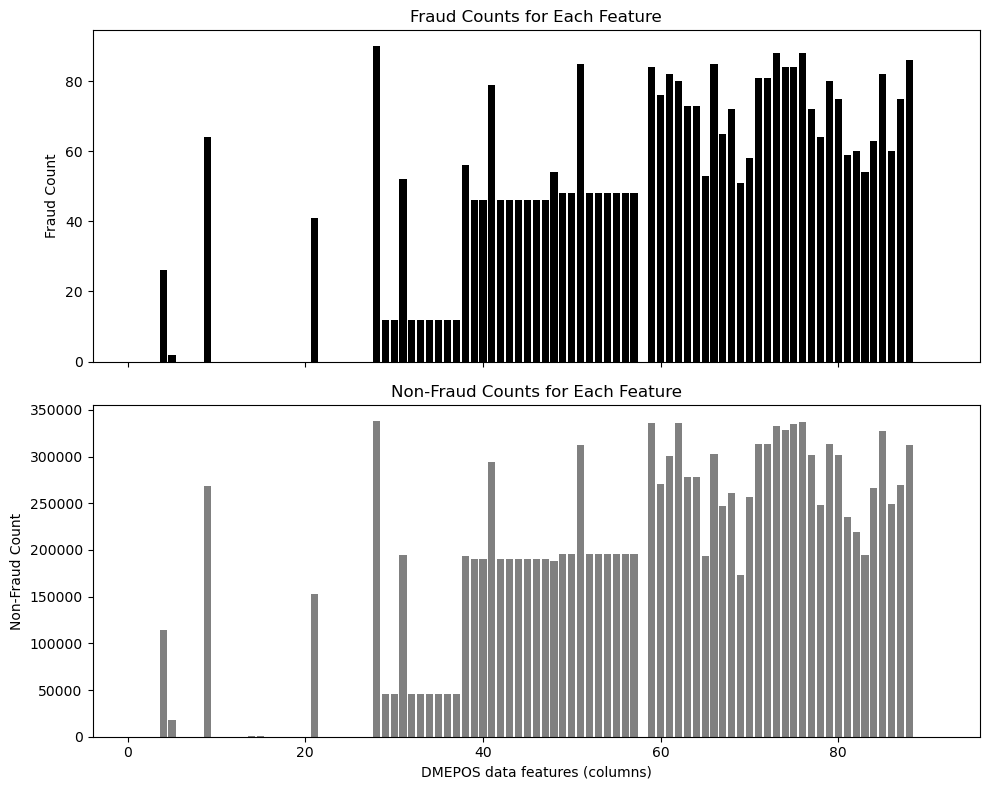

In [22]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for Fraud counts
ax1.bar(df['Feature'], df['Fraud'], color='black', label='Fraud')
ax1.set_ylabel('Fraud Count')
ax1.set_title('Fraud Counts for Each Feature')

# Plot for Non-Fraud counts
ax2.bar(df['Feature'], df['Non-Fraud'], color='gray', label='Non-Fraud')
ax2.set_xlabel('DMEPOS data features (columns)')
ax2.set_ylabel('Non-Fraud Count')
ax2.set_title('Non-Fraud Counts for Each Feature')

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

plt.show()

In [12]:
dmepos_features = dmepos[["Rfrg_NPI","Rfrg_Prvdr_Type","Rfrg_Prvdr_Gndr","Tot_Suplrs","Tot_Suplr_Benes",
        "Tot_Suplr_Clms","Tot_Suplr_Srvcs","Suplr_Sbmtd_Chrgs","Suplr_Mdcr_Alowd_Amt",
        "Suplr_Mdcr_Pymt_Amt","Suplr_Mdcr_Stdzd_Pymt_Amt","Fraud","FraudType"]].dropna(axis=0)

In [13]:
dmepos_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230782 entries, 1 to 383486
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rfrg_NPI                   230782 non-null  int64  
 1   Rfrg_Prvdr_Type            230782 non-null  object 
 2   Rfrg_Prvdr_Gndr            230782 non-null  object 
 3   Tot_Suplrs                 230782 non-null  int64  
 4   Tot_Suplr_Benes            230782 non-null  float64
 5   Tot_Suplr_Clms             230782 non-null  int64  
 6   Tot_Suplr_Srvcs            230782 non-null  int64  
 7   Suplr_Sbmtd_Chrgs          230782 non-null  float64
 8   Suplr_Mdcr_Alowd_Amt       230782 non-null  float64
 9   Suplr_Mdcr_Pymt_Amt        230782 non-null  float64
 10  Suplr_Mdcr_Stdzd_Pymt_Amt  230782 non-null  float64
 11  Fraud                      230782 non-null  int64  
 12  FraudType                  230782 non-null  object 
dtypes: float64(5), int64(5), obje

In [17]:
dmepos_features["Fraud"].value_counts()

0    230721
1        61
Name: Fraud, dtype: int64

In [18]:
dmepos_features.to_csv('labelled_data/DMEPOS/dmepos_features_data.csv')